## Uczenie maszynowe UMZ 2018/2019
# 3. Regresja logistyczna

## 3.1. Metoda gradientu prostego w praktyce

### Kryterium stopu

Na wykresie zobaczymy porównanie regresji dla różnych wartości `eps`

In [32]:
import numpy as np
import matplotlib
import matplotlib.pyplot as pl
import ipywidgets as widgets

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from IPython.display import display, Math, Latex

# Wyświetlanie macierzy w LaTeX-u
def LatexMatrix(matrix):
    ltx = r'\left[\begin{array}'
    m, n = matrix.shape
    ltx += '{' + ("r" * n) + '}'
    for i in range(m):
        ltx += r" & ".join([('%.4f' % j.item()) for j in matrix[i]]) + r" \\ "
    ltx += r'\end{array}\right]'
    return ltx

# Wczytwanie danych z pliku za pomocą numpy
data = np.loadtxt('data_company.csv', delimiter=',')
m, n_plus_1 = data.shape
n = n_plus_1 - 1
Xn = data[:, 0:n].reshape(m, n)

# Dodaj kolumnę jedynek do macierzy
XMx = np.matrix(np.concatenate((np.ones((m, 1)), Xn), axis=1)).reshape(m, n_plus_1)
yMx = np.matrix(data[:, 1]).reshape(m, 1)

# Hipoteza (wersja macierzowa)
def hMx(theta, X):
    return X * theta

# Wykres danych (wersja macierzowa)
def regdotsMx(X, y, xlabel='Populacja', ylabel='Zysk'):    
    fig = pl.figure(figsize=(16*.6, 9*.6))
    ax = fig.add_subplot(111)
    fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)
    ax.scatter([X[:, 1]], [y], c='r', s=50, label='Dane')
    
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.margins(.05, .05)
    pl.ylim(y.min() - 1, y.max() + 1)
    pl.xlim(np.min(X[:, 1]) - 1, np.max(X[:, 1]) + 1)
    return fig

# Wykres krzywej regresji (wersja macierzowa)
def reglineMx(fig, fun, theta, X):
    ax = fig.axes[0]
    x0 = np.min(X[:, 1]) - 1.0
    x1 = np.max(X[:, 1]) + 1.0
    L = [x0, x1]
    LX = np.matrix([1, x0, 1, x1]).reshape(2, 2)
    ax.plot(L, fun(theta, LX), linewidth='2',
            label=(r'$y={theta0:.2}{op}{theta1:.2}x$'.format(
                theta0=float(theta[0][0]),
                theta1=(float(theta[1][0]) if theta[1][0] >= 0 else float(-theta[1][0])),
                op='+' if theta[1][0] >= 0 else '-')))

# Legenda wykresu
def legend(fig):
    ax = fig.axes[0]
    handles, labels = ax.get_legend_handles_labels()
    # try-except block is a fix for a bug in Poly3DCollection
    try:
        fig.legend(handles, labels, fontsize='15', loc='lower right')
    except AttributeError:
        pass

# Wersja macierzowa funkcji kosztu
def JMx(theta,X,y):
    m = len(y)
    J = 1.0 / (2.0 * m) * ((X * theta - y).T * ( X * theta - y))
    return J.item()

# Wersja macierzowa gradientu funkcji kosztu
def dJMx(theta,X,y):
    return 1.0 / len(y) * (X.T * (X * theta - y)) 

# Implementacja algorytmu gradientu prostego za pomocą numpy i macierzy
def GDMx(fJ, fdJ, theta, X, y, alpha=0.1, eps=10**-3):
    current_cost = fJ(theta, X, y)
    logs = [[current_cost, theta]]
    while True:
        theta = theta - alpha * fdJ(theta, X, y) # implementacja wzoru
        current_cost, prev_cost = fJ(theta, X, y), current_cost
        if current_cost > 10000:
            break
        if abs(prev_cost - current_cost) <= eps:
            break
        logs.append([current_cost, theta]) 
    return theta, logs

thetaStartMx = np.matrix([0, 0]).reshape(2, 1)

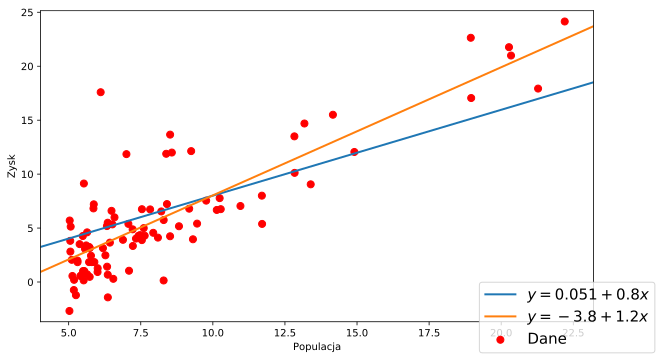

In [33]:
fig = regdotsMx(XMx, yMx)
theta_e1, logs1 = GDMx(JMx, dJMx, thetaStartMx, XMx, yMx, alpha=0.01, eps=0.01)
reglineMx(fig, hMx, theta_e1, XMx)
theta_e2, logs2 = GDMx(JMx, dJMx, thetaStartMx, XMx, yMx, alpha=0.01, eps=0.000001)
reglineMx(fig, hMx, theta_e2, XMx)
legend(fig)

In [34]:
display(Math(r'\theta_{10^{-2}} = ' + LatexMatrix(theta_e1) +
             r'\quad\theta_{10^{-6}} = ' + LatexMatrix(theta_e2)))

<IPython.core.display.Math object>

### Długość kroku ($\alpha$)

In [35]:
# Jak zmienia się koszt w kolejnych krokach w zależności od alfa

def costchangeplot(logs):
    fig = pl.figure(figsize=(16*.6, 9*.6))
    ax = fig.add_subplot(111)
    fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)
    ax.set_xlabel('krok')
    ax.set_ylabel(r'$J(\theta)$')

    X = np.arange(0, 100, 1)
    Y = [logs[step][0] if step < len(logs) else None for step in X]
    ax.plot(X, Y, linewidth='2', label=(r'$J(\theta)$'))
    return fig

def slide1(alpha):
    best_theta, logs = GDMx(JMx, dJMx, thetaStartMx, XMx, yMx, alpha=alpha, eps=0.0001)
    fig = costchangeplot(logs)
    legend(fig)

sliderAlpha1 = widgets.FloatSlider(min=0.01, max=0.03, step=0.001, value=0.02, description=r'$\alpha$', width=300)

In [36]:
widgets.interact_manual(slide1, alpha=sliderAlpha1)

interactive(children=(FloatSlider(value=0.02, description=u'$\\alpha$', max=0.03, min=0.01, step=0.001), Button(description=u'Run Interact', style=ButtonStyle()), Output()), _dom_classes=('widget-interact',))

<function __main__.slide1>

## 3.2. Normalizacja danych

Użyjemy danych z „Gratka flats challenge 2017”.

Rozważmy model $h(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2$, w którym cena mieszkania prognozowana jest na podstawie liczby pokoi $x_1$ i metrażu $x_2$:

In [37]:
# Wczytanie danych przy pomocy biblioteki pandas
import pandas
alldata = pandas.read_csv('data_flats.tsv', header=0, sep='\t',
                          usecols=['price', 'rooms', 'sqrMetres'])
alldata[:10]

,price,rooms,sqrMetres
0,476118.00,3,78
1,459531.00,3,62
2,411557.00,3,15
3,496416.00,4,14
4,406032.00,3,15
5,450026.00,3,80
6,571229.15,2,39
7,325000.00,3,54
8,268229.00,2,90
9,604836.00,4,40


In [38]:
def show_mins_and_maxs(XMx):
    mins = np.amin(XMx, axis=0).tolist()[0]  # wartości minimalne
    maxs = np.amax(XMx, axis=0).tolist()[0]  # wartości maksymalne
    for i, (xmin, xmax) in enumerate(zip(mins, maxs)):
        display(Math(
            r'${:.2F} \leq x_{} \leq {:.2F}$'.format(xmin, i, xmax)))

In [39]:
# Przygotowanie danych

import numpy as np

%matplotlib inline

data2 = np.matrix(alldata[['rooms', 'sqrMetres', 'price']])

m, n_plus_1 = data2.shape
n = n_plus_1 - 1
Xn = data2[:, 0:n]

XMx2 = np.matrix(np.concatenate((np.ones((m, 1)), Xn), axis=1)).reshape(m, n_plus_1)
yMx2 = np.matrix(data2[:, -1]).reshape(m, 1) / 1000.0

Cechy w danych treningowych przyjmują wartości z zakresu:

In [40]:
show_mins_and_maxs(XMx2)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Jak widzimy, $x_2$ przyjmuje wartości dużo większe niż $x_1$.
Powoduje to, że wykres funkcji kosztu jest bardzo „spłaszczony” wzdłuż jednej z osi:

In [41]:
def contour_plot(X, y, rescale=10**8):
    theta0_vals = np.linspace(-100000, 100000, 100)
    theta1_vals = np.linspace(-100000, 100000, 100)

    J_vals = np.zeros(shape=(theta0_vals.size, theta1_vals.size))
    for t1, element in enumerate(theta0_vals):
        for t2, element2 in enumerate(theta1_vals):
            thetaT = np.matrix([1.0, element, element2]).reshape(3,1)
            J_vals[t1, t2] = JMx(thetaT, X, y) / rescale
            
    pl.figure()
    pl.contour(theta0_vals, theta1_vals, J_vals.T, np.logspace(-2, 3, 20))
    pl.xlabel(r'$\theta_1$')
    pl.ylabel(r'$\theta_2$')

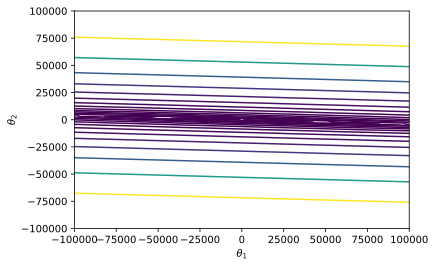

In [42]:
contour_plot(XMx2, yMx2, rescale=10**10)

### Skalowanie

Będziemy dążyć do tego, żeby każda z cech przyjmowała wartości w podobnym zakresie.

W tym celu przeskalujemy wartości każdej z cech, dzieląc je przez wartość maksymalną:

$$ \hat{x_i}^{(j)} := \frac{x_i^{(j)}}{\max_j x_i^{(j)}} $$

In [43]:
XMx2_scaled = XMx2 / np.amax(XMx2, axis=0)

show_mins_and_maxs(XMx2_scaled)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

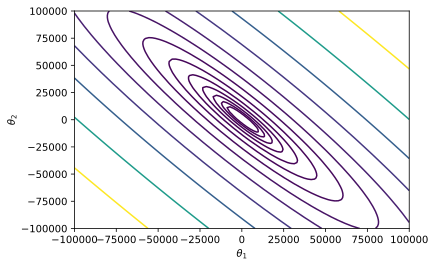

In [44]:
contour_plot(XMx2_scaled, yMx2)

### Normalizacja średniej

Będziemy dążyć do tego, żeby dodatkowo średnia wartość każdej z cech była w okolicach $0$.

W tym celu oprócz przeskalowania odejmiemy wartość średniej od wartości każdej z cech:

$$ \hat{x_i}^{(j)} := \frac{x_i^{(j)} - \mu_i}{\max_j x_i^{(j)}} $$

In [45]:
XMx2_norm = (XMx2 - np.mean(XMx2, axis=0)) / np.amax(XMx2, axis=0)

show_mins_and_maxs(XMx2_norm)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

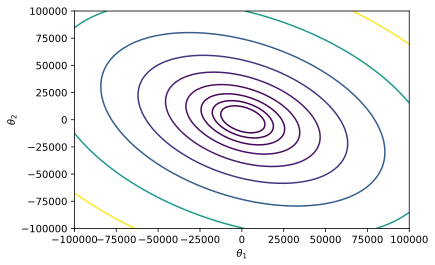

In [46]:
contour_plot(XMx2_norm, yMx2)

## 3.3. Regresja logistyczna

 * Uwaga: _regresja_ logistyczna jest algorytmem dla problemów _klasyfikacji_ (nie _regresji_, wbrew nazwie)!

### Klasyfikacja dwuklasowa

<img style="float: right;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg/450px-Kosaciec_szczecinkowaty_Iris_setosa.jpg">

### Przykład: kosaciec szczecinkowy (_Iris setosa_)

Mamy dane dotyczące długości płatków i chcielibyśmy na tej podstawie określić, czy jest to roślina z gatunku _Iris setosa_

In [47]:
import pandas
data_iris_setosa = (
    pandas.read_csv('iris.csv', usecols=['pł.dł.', 'Gatunek'])
    .apply(lambda x: [x[0], 1 if x[1] == 'Iris-setosa' else 0], axis=1))
data_iris_setosa.columns = ['dł. płatka', 'Iris setosa?']
data_iris_setosa[:6]

,dł. płatka,Iris setosa?
0,1.4,1.0
1,1.5,1.0
2,5.6,0.0
3,5.1,0.0
4,4.5,0.0
5,5.1,0.0


In [48]:
# Rysowanie progu
def threshold(fig, theta):
    x_thr = (0.5 - theta.item(0)) / theta.item(1)
    ax = fig.axes[0]
    ax.plot([x_thr, x_thr], [-1, 2],
            color='orange', linestyle='dashed',
            label=u'próg: $x={:.2F}$'.format(x_thr))

Spróbujmy zastosować regresję liniową:

In [49]:
m, n_plus_1 = data_iris_setosa.values.shape
n = n_plus_1 - 1
Xn = data_iris_setosa.values[:, 0:n].reshape(m, n)

XMx3 = np.matrix(np.concatenate((np.ones((m, 1)), Xn), axis=1)).reshape(m, n_plus_1)
yMx3 = np.matrix(data_iris_setosa.values[:, 1]).reshape(m, 1)

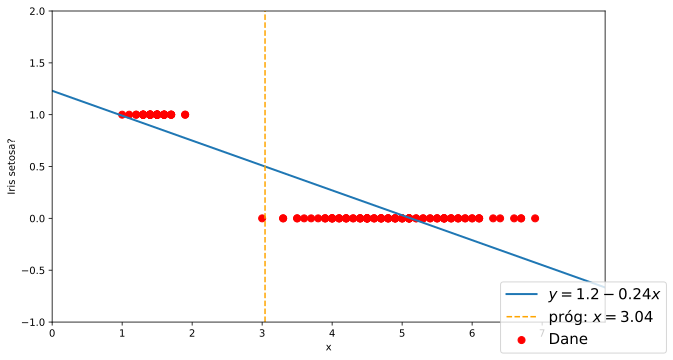

In [50]:
fig = regdotsMx(XMx3, yMx3, xlabel='x', ylabel='Iris setosa?')
theta_e3, logs3 = GDMx(JMx, dJMx, thetaStartMx, XMx3, yMx3, alpha=0.03, eps=0.000001)
reglineMx(fig, hMx, theta_e3, XMx3)
threshold(fig, theta_e3)
legend(fig)

 * Krzywa regresji liniowej jest niezbyt dopasowana do danych klasyfikacyjnych.
 * Zastosowanie progu $y = 0.5$ nie zawsze pomaga uzyskać sensowny rezultat.
 * $h(x)$ może przyjmować wartości mniejsze od $0$ i większe od $1$ – jak interpretować takie wyniki?

Wniosek: w przypadku problemów klasyfikacyjnych regresja liniowa nie wydaje się najlepszym rozwiązaniem.

Funkcja logistyczna (sigmoidalna):

$$g(x) = \dfrac{1}{1+e^{-x}}$$

In [51]:
def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))

In [52]:
import matplotlib.pyplot as plt
def plot_logistic():
    x = np.linspace(-5,5,200)
    y = logistic(x)

    fig = plt.figure(figsize=(7,5))
    ax = fig.add_subplot(111)
    plt.ylim(-.1,1.1)
    ax.plot(x, y, linewidth='2')

Wykres funkcji logistycznej $g(x) = \dfrac{1}{1+e^{-x}}$:

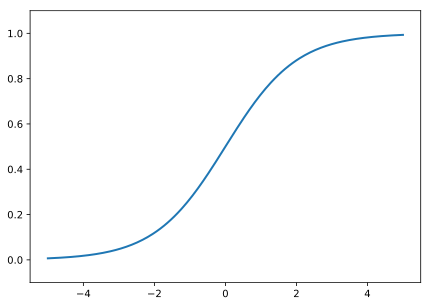

In [53]:
plot_logistic()

Funkcja regresji logistycznej:

$$h_\theta(x) = g(\theta^T \, x) = \dfrac{1}{1 + e^{-\theta^T x}}$$

Wersja macierzowa:

$$h_\theta(X) = g(X \, \theta) = \dfrac{1}{1 + e^{-X \theta}}$$

In [54]:
# Funkcja regresji logistcznej
def h(theta, X):
    return 1.0/(1.0 + np.exp(-X * theta))

Funkcja kosztu dla regresji logistycznej:

$$J(\theta) = -\dfrac{1}{m} \left( \sum_{i=1}^{m} y^{(i)} \log h_\theta( x^{(i)} ) + \left( 1 - y^{(i)} \right) \log \left( 1 - h_\theta (x^{(i)}) \right) \right)$$

Gradient dla regresji logistycznej (wersja macierzowa):

$$\nabla J(\theta) = \frac{1}{|\vec y|} X^T \left( h_\theta(X) - \vec y \right)$$

(Jedyna różnica między gradientem dla regresji logistycznej a gradientem dla regresji liniowej to postać $h_\theta$).

In [55]:
# Funkcja kosztu dla regresji logistycznej
def J(h, theta, X, y):
    m = len(y)
    h_val = h(theta, X)
    s1 = np.multiply(y, np.log(h_val))
    s2 = np.multiply((1 - y), np.log(1 - h_val))
    return -np.sum(s1 + s2, axis=0) / m

In [56]:
# Gradient dla regresji logistycznej
def dJ(h, theta, X, y):
    return 1.0 / len(y) * (X.T * (h(theta, X) - y))

In [57]:
# Metoda gradientu prostego dla regresji logistycznej
def GD(h, fJ, fdJ, theta, X, y, alpha=0.01, eps=10**-3, maxSteps=10000):
    errorCurr = fJ(h, theta, X, y)
    errors = [[errorCurr, theta]]
    while True:
        # oblicz nowe theta
        theta = theta - alpha * fdJ(h, theta, X, y)
        # raportuj poziom błędu
        errorCurr, errorPrev = fJ(h, theta, X, y), errorCurr
        # kryteria stopu
        if abs(errorPrev - errorCurr) <= eps:
            break
        if len(errors) > maxSteps:
            break
        errors.append([errorCurr, theta]) 
    return theta, errors

In [58]:
# Uruchomienie metody gradientu prostego dla regresji logistycznej
thetaBest, errors = GD(h, J, dJ, thetaStartMx, XMx3, yMx3, 
                       alpha=0.1, eps=10**-7, maxSteps=1000)
print("error =", errors[-1][0])
print("theta =", thetaBest)

('error =', matrix([[0.05755617]]))
('theta =', matrix([[ 5.02530461],
        [-1.99174803]]))


In [59]:
# Funkcja regresji logistycznej (wersja skalarna)
def scalar_logistic_regression_function(theta, x):
    return 1.0/(1.0 + np.exp(-(theta.item(0) + theta.item(1) * x)))

# Rysowanie progu
def threshold_val(fig, x_thr):
    ax = fig.axes[0]
    ax.plot([x_thr, x_thr], [-1, 2],
            color='orange', linestyle='dashed',
            label=u'próg: $x={:.2F}$'.format(x_thr))

# Wykres krzywej regresji logistycznej
def logistic_regline(fig, theta, X):
    ax = fig.axes[0]
    x0 = np.min(X[:, 1]) - 1.0
    x1 = np.max(X[:, 1]) + 1.0
    Arg = np.arange(x0, x1, 0.1)
    Val = scalar_logistic_regression_function(theta, Arg)
    ax.plot(Arg, Val, linewidth='2')

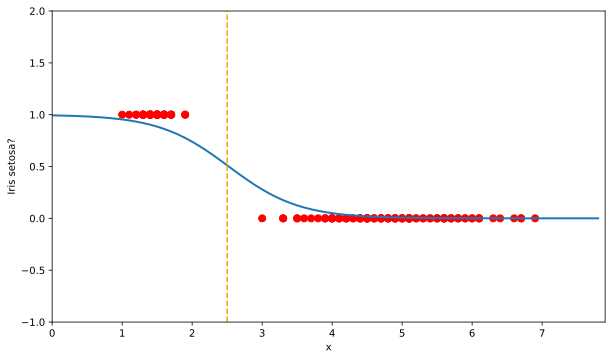

In [60]:
fig = regdotsMx(XMx3, yMx3, xlabel='x', ylabel='Iris setosa?')
logistic_regline(fig, thetaBest, XMx3)
threshold_val(fig, 2.5)

Traktujemy wartość $h_\theta(x)$ jako prawdopodobieństwo, że cecha przyjmie wartość pozytywną:

$$ h_\theta(x) = P(y = 1 \, | \, x; \theta) $$

### Dwuklasowa regresja logistyczna: więcej cech

Weźmy pod uwagę następujące cechy:
 * długość dziełek kielicha
 * szerokość działek kielicha
 * długość płatka
 * szerokość płatka

In [62]:
import pandas
src_cols = ['sl', 'sw', 'pl', 'pw', 'Gatunek']
trg_cols = ['sl', 'sw', 'pl', 'pw', 'Iris setosa?']
data_iris_setosa_multi = (
    pandas.read_csv('iris.csv', usecols=src_cols)
    .apply(lambda x: [x[0], x[1], x[2], x[3], 1 if x[4] == 'Iris-setosa' else 0], axis=1))
data_iris_setosa_multi.columns = trg_cols
data_iris_setosa_multi[:6]

,sl,sw,pl,pw,Iris setosa?
0,5.2,3.4,1.4,0.2,1.0
1,5.1,3.7,1.5,0.4,1.0
2,6.7,3.1,5.6,2.4,0.0
3,6.5,3.2,5.1,2.0,0.0
4,4.9,2.5,4.5,1.7,0.0
5,6.0,2.7,5.1,1.6,0.0


In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn

In [ ]:
seaborn.pairplot(
    data_iris_setosa_multi,
    vars=[c for c in data_iris_setosa_multi.columns if c != 'Iris setosa?'], 
    hue='Iris setosa?', size=1.5, aspect=1.75)

In [ ]:
# Przygotowanie danych
m, n_plus_1 = data_iris_setosa_multi.values.shape
n = n_plus_1 - 1
Xn = data_iris_setosa_multi.values[:, 0:n].reshape(m, n)

XMx4 = np.matrix(np.concatenate((np.ones((m, 1)), Xn), axis=1)).reshape(m, n_plus_1)
yMx4 = np.matrix(data_iris_setosa_multi.values[:, n]).reshape(m, 1)

print(XMx4[:6])
print(yMx4[:6])

In [ ]:
# Podział danych na zbiór trenujący i testowy
XTrain, XTest = XMx4[:100], XMx4[100:]
yTrain, yTest = yMx4[:100], yMx4[100:]

# Macierz parametrów początkowych
thetaTemp = np.ones(5).reshape(5,1)

In [ ]:
thetaBest, errors = GD(h, J, dJ, thetaTemp, XTrain, yTrain, 
                       alpha=0.1, eps=10**-7, maxSteps=1000)
print("error =", errors[-1][0])
print("theta =", thetaBest)

### Funkcja decyzyjna regresji logistycznej

$$ c = \left\{ 
\begin{array}{ll}
1, & \mbox{gdy } P(y=1 \, | \, x; \theta) > 0.5 \\
0 & \mbox{w przeciwnym przypadku}
\end{array}\right.
$$

$$ P(y=1 \,| \, x; \theta) = h_\theta(x) $$

In [ ]:
def classifyBi(theta, X):
    prob = h(theta, X).item()
    return (1, prob) if prob > 0.5 else (0, prob)

print("theta =", thetaBest)
print("x0 =", XTest[0])
print("h(x0) =", h(thetaBest, XTest[0]).item())
print("c(x0) =", classifyBi(thetaBest, XTest[0]), "\n")

### Skuteczność

In [ ]:
acc = 0.0
for i, rest in enumerate(yTest):
    cls, prob = classifyBi(thetaBest, XTest[i])
    if i < 10:
        print(int(yTest[i].item()), "<=>", cls, "-- prob:", round(prob, 4))
    acc += cls == yTest[i].item()

print("\nAccuracy:", acc / len(XTest))

## 3.4. Wieloklasowa regresja logistyczna

### Przykład: gatunki irysów (kosaćców)

<img style="float: right;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg/450px-Kosaciec_szczecinkowaty_Iris_setosa.jpg">

Kosaciec szczecinkowy (_Iris setosa_)

<img style="float: right;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Iris_virginica.jpg/736px-Iris_virginica.jpg">

Kosaciec amerykański (_Iris virginica_)

<img style="float: right;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/27/Blue_Flag%2C_Ottawa.jpg/600px-Blue_Flag%2C_Ottawa.jpg">

Kosaciec różnobarwny (_Iris versicolor_)

Cechy:
 * długość działek kielicha
 * szerokość działek kielicha
 * długość płatka
 * szerokość płatka

Wczytanie danych

In [ ]:
import pandas
data_iris = pandas.read_csv('iris.csv')
data_iris[:6]

Przygotowanie danych

In [ ]:
import numpy as np

features = ['sl', 'sw', 'pl', 'pw']
m = len(data_iris)
X = np.matrix(data_iris[features])
X0 = np.ones(m).reshape(m, 1)
X = np.hstack((X0, X))
y = np.matrix(data_iris[["Gatunek"]]).reshape(m, 1)

print("X = ", X[:4])
print("y = ", y[:4])

Zamieńmy etykiety tekstowe w tablicy $y$ na wektory jednostkowe (_one-hot vectors_):

$$
\begin{array}{ccc}
\mbox{"Iris-setosa"}     & \mapsto & \left[ \begin{array}{ccc} 1 & 0 & 0 \\ \end{array} \right] \\
\mbox{"Iris-virginica"}  & \mapsto & \left[ \begin{array}{ccc} 0 & 1 & 0 \\ \end{array} \right] \\
\mbox{"Iris-versicolor"} & \mapsto & \left[ \begin{array}{ccc} 0 & 0 & 1 \\ \end{array} \right] \\
\end{array}
$$

Wówczas zamiast wektora $y$ otrzymamy macierz $Y$:

$$
y \; = \;
\left[
\begin{array}{c}
y^{(1)}     \\
y^{(2)}     \\
y^{(3)}     \\
y^{(4)}     \\
y^{(5)}     \\
\vdots      \\
\end{array}
\right]
\; = \;
\left[
\begin{array}{c}
\mbox{"Iris-setosa"}     \\
\mbox{"Iris-setosa"}     \\
\mbox{"Iris-virginica"}  \\
\mbox{"Iris-versicolor"} \\
\mbox{"Iris-virginica"}  \\
\vdots                   \\
\end{array}
\right]
\quad \mapsto \quad
Y \; = \;
\left[
\begin{array}{ccc}
1 & 0 & 0 \\
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1 \\
0 & 1 & 0 \\
\vdots & \vdots & \vdots \\
\end{array}
\right]
$$

In [ ]:
def mapY(y, cls):
    m = len(y)
    yBi = np.matrix(np.zeros(m)).reshape(m, 1)
    yBi[y == cls] = 1.
    return yBi

def indicatorMatrix(y):
    classes = np.unique(y.tolist())
    m = len(y)
    k = len(classes)
    Y = np.matrix(np.zeros((m, k)))
    for i, cls in enumerate(classes):
        Y[:, i] = mapY(y, cls)
    return Y

# one-hot matrix
Y = indicatorMatrix(y)

In [ ]:
# Podział danych na zbiór trenujący i testowy
XTrain, XTest = X[:100], X[100:]
YTrain, YTest = Y[:100], Y[100:]

# Macierz parametrów początkowych
thetaTemp = np.ones(5).reshape(5,1)

In [ ]:
g = seaborn.pairplot(data_iris, hue='Gatunek', size=1.75, aspect=1.5) 

### Od regresji logistycznej dwuklasowej do wieloklasowej

* Irysy są przydzielone do trzech klas: _Iris-setosa_ (0), _Iris-versicolor_ (1), _Iris-virginica_ (2).
* Wiemy, jak stworzyć klasyfikatory typu _Iris-setosa_ vs. _Nie-Iris-setosa_ (tzw. _one-vs-all_).
* Możemy stworzyć trzy klasyfikatory $h_{\theta_1}, h_{\theta_2}, h_{\theta_3}$ (otrzymując trzy zestawy parametrów $\theta$) i wybrać klasę o najwyższym prawdopodobieństwie.

### Funkcja _softmax_

Odpowiednikiem funkcji logistycznej dla wieloklasowej regresji logistycznej jest funkcja $\mathrm{softmax}$:

$$ \textrm{softmax}(k,x_1,\dots,x_n) = \dfrac{e^{x_k}}{\sum_{i=i}^{n}e^{x_i}} $$

$$P(y=c|x;\theta_1,\ldots,\theta_k) = \textrm{softmax}(c,\theta_1^Tx,\ldots,\theta_k^Tx)$$

In [ ]:
# Zapis macierzowy funkcji softmax
def softmax(X):
    return np.exp(X) / np.sum(np.exp(X))

X5 = X[:3]
print("X5 =", X5)
print("softmax =", softmax(X5))

In [ ]:
XN = np.matrix([2.1, 0.5, 0.8, 0.9, 3.2]).reshape(5,1)
P = softmax(XN)
print(XN)
print("Suma X =", np.sum(XN), "\n")
print(P)
print("Suma P =", np.sum(P)) 

In [ ]:
def trainMaxEnt(X, Y):
    n = X.shape[1]
    thetas = []
    for c in range(Y.shape[1]):
        YBi = Y[:,c]
        theta = np.matrix(np.random.random(n)).reshape(n,1)
        thetaBest, errors = GD(h, J, dJ, theta, 
                               X, YBi, alpha=0.1, eps=10**-4)
        thetas.append(thetaBest)
    return thetas

thetas = trainMaxEnt(XTrain, YTrain);
for theta in thetas:
    print(theta, "\n")

### Funkcja decyzyjna wieloklasowej regresji logistycznej

$$ c = \mathop{\textrm{arg}\,\textrm{max}}_{i \in \{1, \ldots ,k\}} P(y=i|x;\theta_1,\ldots,\theta_k) $$

In [ ]:
def classify(thetas, X, debug=False):
    regs = np.array([(X*theta).item() for theta in thetas])
    if debug:
        print("regs  =", regs)
    probs = softmax(regs)
    if debug:
        print("probs =", np.around(probs,decimals=3))
    return np.argmax(probs), probs

print("YTest =", YTest[:6])
YTestCls = YTest * np.matrix((0,1,2)).T
print("YTestCls =", YTestCls[:6], "\n")

### Ewaluacja

In [ ]:
acc = 0.0
for i in range(len(YTestCls)):
    cls, probs = classify(thetas, XTest[i], i < 6)
    correctCls = int(YTestCls[i].item())
    if i < 6:
        print(correctCls, "  <=>", cls, " -- ", cls == correctCls, np.round(probs, 4).tolist())
    acc += correctCls == cls
print("\nAccuracy =", acc/len(XTest))